# Análisis de SMD desde NAMD

## 1. Análisis del log de SMD
Mayo-Junio 2018

In [1]:
file = "run/ubq_wb_eq.out"

In [74]:
labels = ["","TS","BOND","ANGLE","DIHED","IMPRP","ELECT","VDW","BOUNDARY","MISC","KINETIC","TOTAL",
          "TEMP","POTENTIAL","TOTAL3","TEMPAVG","PRESSURE","GPRESSURE","VOLUME","PRESSAVG","GPRESSAVG"]

In [37]:
with open(file, "r") as f:
    lineas = f.readlines()
    energy = []
    for l in lineas:
        if l.startswith("ENERGY:") == True:
            e = [x for x in l.split(" ") if len(x)>0]
            energy.append(e)
            

In [56]:
from pprint import pprint
pprint(energy[0:12])

[['ENERGY:',
  '0',
  '263.6137',
  '847.5817',
  '263.7656',
  '10.7299',
  '-18211.2723',
  '2548343.3659',
  '0.0000',
  '0.0000',
  '0.0000',
  '2531517.7844',
  '0.0000',
  '2531517.7844',
  '2531517.7844',
  '0.0000',
  '7207810.0187',
  '7445540.5660',
  '77280.0000',
  '7207810.0187',
  '7445540.5660\n'],
 ['ENERGY:',
  '1',
  '263.2963',
  '846.9567',
  '263.8745',
  '10.9841',
  '-18371.5667',
  '925654.2167',
  '0.0000',
  '0.0000',
  '0.0000',
  '908667.7616',
  '0.0000',
  '908667.7616',
  '908667.7616',
  '0.0000',
  '2284860.4948',
  '2393985.5916',
  '77280.0000',
  '2284860.4948',
  '2393985.5916\n'],
 ['ENERGY:',
  '2',
  '263.2963',
  '846.9567',
  '263.8745',
  '10.9841',
  '-18413.3573',
  '644676.1996',
  '0.0000',
  '0.0000',
  '0.0000',
  '627647.9538',
  '0.0000',
  '627647.9538',
  '627647.9538',
  '0.0000',
  '1943975.8185',
  '2042451.4937',
  '77280.0000',
  '1943975.8185',
  '2042451.4937\n'],
 ['ENERGY:',
  '3',
  '263.2963',
  '846.9567',
  '263.8745',
 

In [59]:
x = []
print(labels[12])
for e in energy[1010:]:
    temp = e[12]
    x.append(temp)

TEMP


In [7]:
%matplotlib inline

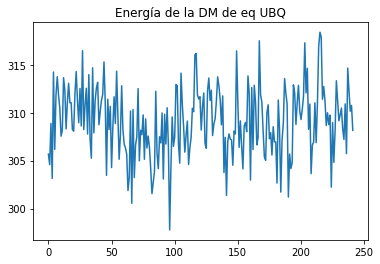

In [61]:
import pylab
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots()
plt.title("Energía de la DM de eq UBQ")
plt.plot(x)

In [89]:
def grafico(pos=1):    
    x = []
    print(labels[pos])
    for e in energy[50:1000]:
        temp = e[pos]
        x.append(temp)
    
    import pylab
    import matplotlib.pyplot as plt
    import numpy as np

    fig, ax = plt.subplots()
    plt.title("Energía de %s desde la DM de eq UBQ"%labels[pos])
    plt.plot(x)

TOTAL


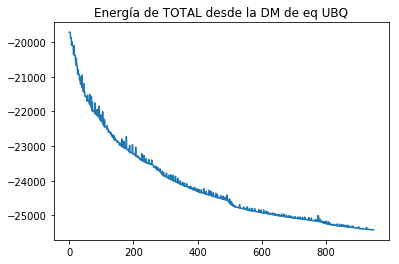

In [90]:
grafico(11)

## 2. RMSD y RMSF

Visualizar nglview en jupyter
* https://github.com/arose/nglview
* pip install nglview==1.0
* jupyter-nbextension enable nglview --py --sys-prefix

In [1]:
import nglview as nv
import pytraj as pt

In [2]:
traj = pt.load("run/ubq_wb_eq.dcd", top="common/ubq_wb.psf")
traj.strip(":TIP3") # adding new trajectory
view = nv.show_pytraj(traj)

In [9]:
view

NGLWidget(count=100)

## RMSD con Pytraj

In [4]:
data = pt.distance_rmsd(traj, ref=-1)
# compute distance_rmsd to first frame with mask = '@CA'
data = pt.distance_rmsd(traj, ref=0, mask='@CA')

In [5]:
import pylab
import matplotlib.pyplot as plt
import numpy as np

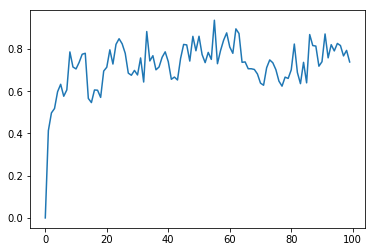

In [8]:
plt.plot(data)

## RMSF con pytraj

In [38]:
data = pt.rmsf(traj, '@CA', options='byatom') # or pt.atomicfluct

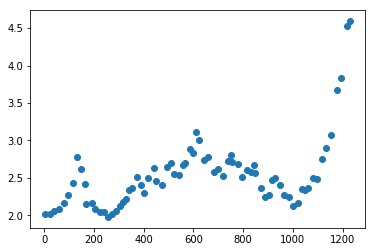

In [39]:
plt.scatter([x[0] for x in data], [y[1] for y in data])